# Investigating NGC1851
- This notebook aims to use the gaia subset obtained initially to verify that globuluar clusters can be located and the relative population size and span of characterisitcs

In [188]:
from Analysis import reddening_correction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

# NGC1851

### Loading the data

In [190]:
# Loading the data
NGC1851_path = 'data/NGC1851.fits'
with fits.open(NGC1851_path) as NGC1851_hdul:
    NGC1851_data = Table(NGC1851_hdul[1].data).to_pandas()
    display(NGC1851_data.describe())

source_id            l            b           ra          dec  \
count  1.582000e+03  1582.000000  1582.000000  1582.000000  1582.000000   
mean   4.819185e+18   244.517728   -35.024316    78.543078   -40.047906   
std    6.035196e+14     0.409799     0.330494     0.432852     0.334850   
min    4.813151e+18   243.296643   -36.025999    77.242998   -41.028562   
25%    4.819185e+18   244.435061   -35.097932    78.450051   -40.111036   
50%    4.819198e+18   244.512014   -35.031426    78.532825   -40.047012   
75%    4.819280e+18   244.592282   -34.951773    78.633788   -39.984428   
max    4.820137e+18   245.714822   -34.041557    79.810544   -39.050582   

          ra_error    dec_error  phot_g_mean_mag  phot_bp_mean_mag  \
count  1582.000000  1582.000000      1582.000000       1582.000000   
mean      0.330344     0.388709        19.415979         19.724140   
std       0.283710     0.329888         1.308555          1.327601   
min       0.008600     0.009956        12.838944         13.680194   
25%       0.131991     0.154570        18.887674         19.141962   
50%       0.260795     0.298285        19.760604         20.047030   
75%       0.435380     0.512864        20.370358         20.687428   
max       1.943939     2.062157        21.019341         22.029596   

       phot_rp_mean_mag  ...         pmra        pmdec  radial_velocity  \
count       1582.000000  ...  1582.000000  1582.000000         9.000000   
mean          18.805561  ...     2.467477    -0.152325       198.318085   
std            1.318268  ...     2.267533     3.213143       129.961700   
min           11.945064  ...    -5.405900   -24.310617        49.541039   
25%           18.253304  ...     1.706819    -1.016644        86.818481   
50%           19.150367  ...     2.168091    -0.559725       143.002243   
75%           19.719744  ...     2.737495     0.339948       324.787384   
max           21.230032  ...    28.111432    33.947710       356.980621   

       mh_gspphot  teff_gspphot  logg_gspphot        bp_rp  r_med_photogeo  \
count  396.000000    396.000000    396.000000  1582.000000     1582.000000   
mean    -1.480854   5591.044434      4.482397     0.918579     7183.169434   
std      0.927037   1246.200439      0.528008     0.376571     3922.729980   
min     -4.049800   3926.206787      1.633800    -0.434519      360.734528   
25%     -1.795750   5134.918457      4.505050     0.695786     3832.682068   
50%     -1.340900   5425.670898      4.701200     0.826439     6915.429199   
75%     -0.849300   5748.459473      4.741075     1.046174    10101.152344   
max      0.213200  18156.365234      4.898800     2.877966    23601.271484   

       r_hi_photogeo  r_lo_photogeo  
count    1582.000000    1582.000000  
mean     9031.606445    5683.787598  
std      4917.316406    3197.199707  
min       377.837616     314.054321  
25%      4752.362305    3039.212158  
50%      8668.484375    5455.166504  
75%     12640.622070    7997.284424  
max     29724.853516   20499.656250  

[8 rows x 22 columns]

In [191]:
# ---------------- Proper Motion Selection ----------------
pmra_lim_lo, pmra_lim_hi = 2.0, 2.35
pmdec_lim_lo, pmdec_lim_hi = -0.8, -0.5

/var/folders/ps/rqln7sh519b4cnjyq2mm94s40000gn/T/ipykernel_13307/2124373964.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


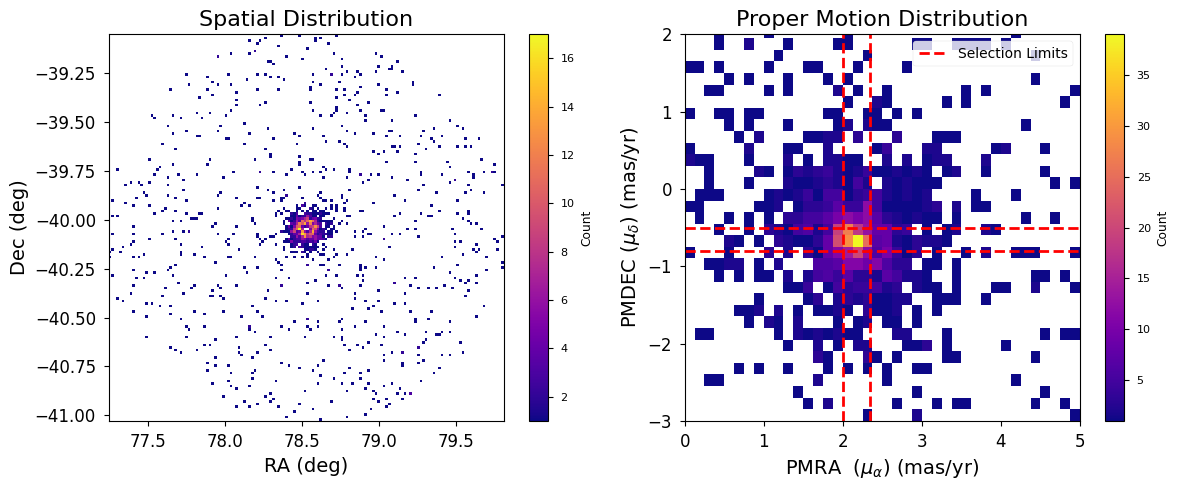

In [192]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ------------ RA vs Dec ------------
h1 = axes[0].hist2d(NGC1851_data.ra, NGC1851_data.dec, bins=150, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_xlabel("RA (deg)", fontsize=14)
axes[0].set_ylabel("Dec (deg)", fontsize=14)
axes[0].set_title("Spatial Distribution", fontsize=16)


# ------------ Proper Motion ------------
h2 = axes[1].hist2d(
    NGC1851_data.pmra, NGC1851_data.pmdec, bins=800, cmin=1, range=[[-50, 50], [-60, 60]], cmap="plasma"
)
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].set_xlabel(r"PMRA  ($\mu_{\alpha}$) (mas/yr)", fontsize=14)
axes[1].set_ylabel(r"PMDEC ($\mu_{\delta}$) (mas/yr)", fontsize=14)
axes[1].set_title("Proper Motion Distribution", fontsize=16)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_xlim(0, 5)
axes[1].set_ylim(-3, 2)
axes[1].axvline(pmra_lim_lo, color="red", linestyle="--", linewidth=2, label="Selection Limits")
axes[1].axvline(pmra_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_lo, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].legend(fontsize=10)


plt.tight_layout()
plt.show()

In [193]:
# Applying reddening correction
NGC1851_data_dered = reddening_correction(NGC1851_data)

# Describe both to see differences
NGC1851_data_dered[["phot_bp_mean_mag","dered_BP", "phot_rp_mean_mag", "dered_RP", "phot_g_mean_mag", "dered_G"]].describe()


phot_bp_mean_mag     dered_BP  phot_rp_mean_mag     dered_RP  \
count       1582.000000  1582.000000       1582.000000  1582.000000   
mean          19.724140    19.619917         18.805561    18.744095   
std            1.327601     1.327963          1.318268     1.318205   
min           13.680194    13.579979         11.945064    11.882760   
25%           19.141962    19.037909         18.253304    18.189887   
50%           20.047030    19.938569         19.150367    19.088278   
75%           20.687428    20.586511         19.719744    19.658365   
max           22.029596    21.950787         21.230032    21.171097   

       phot_g_mean_mag      dered_G  
count      1582.000000  1582.000000  
mean         19.415979    19.332365  
std           1.308555     1.308632  
min          12.838944    12.762593  
25%          18.887674    18.799568  
50%          19.760604    19.676792  
75%          20.370358    20.283885  
max          21.019341    20.948174

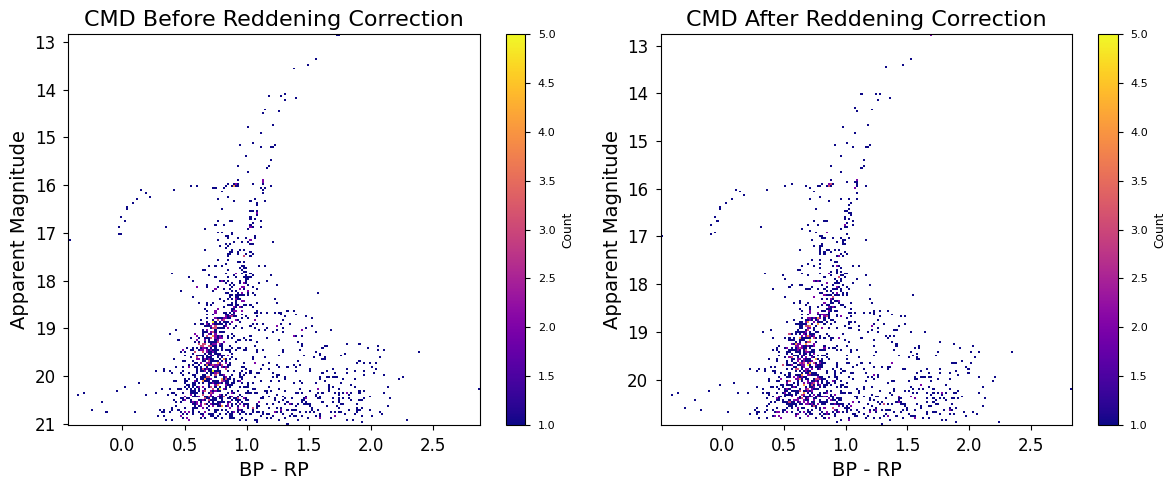

In [194]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bp_rp_before = NGC1851_data.phot_bp_mean_mag - NGC1851_data.phot_rp_mean_mag
bp_rp_after = NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP
g_before = NGC1851_data.phot_g_mean_mag
g_after = NGC1851_data_dered.dered_G

# ------------ CMD Before Reddening Correction ------------
h1 = axes[0].hist2d(bp_rp_before, g_before, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis="both", labelsize=12)
axes[0].set_xlabel("BP - RP", fontsize=14)
axes[0].set_ylabel("Apparent Magnitude", fontsize=14)
axes[0].set_title("CMD Before Reddening Correction", fontsize=16)
axes[0].invert_yaxis() 

# ------------ CMD After Reddening Correction ------------
h2 = axes[1].hist2d(bp_rp_after, g_after, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].set_xlabel("BP - RP", fontsize=14)
axes[1].set_ylabel("Apparent Magnitude", fontsize=14)  # Fixed incorrect label
axes[1].set_title("CMD After Reddening Correction", fontsize=16)
axes[1].invert_yaxis()  

plt.tight_layout()
plt.show()



### Calculate Absolute Magnitude from Bailer Jones Distances

In [195]:
NGC1851_data_dered["abs_G"] = NGC1851_data_dered.dered_G - 5 * np.log10(NGC1851_data_dered.r_med_photogeo) + 5

### Identifying Cluster Stars based on Proper Motions

In [196]:
NGC1851_pm_filtered = NGC1851_data_dered[
    (NGC1851_data_dered.pmra > pmra_lim_lo) & (NGC1851_data_dered.pmra < pmra_lim_hi) &
    (NGC1851_data_dered.pmdec > pmdec_lim_lo) & (NGC1851_data_dered.pmdec < pmdec_lim_hi)
]

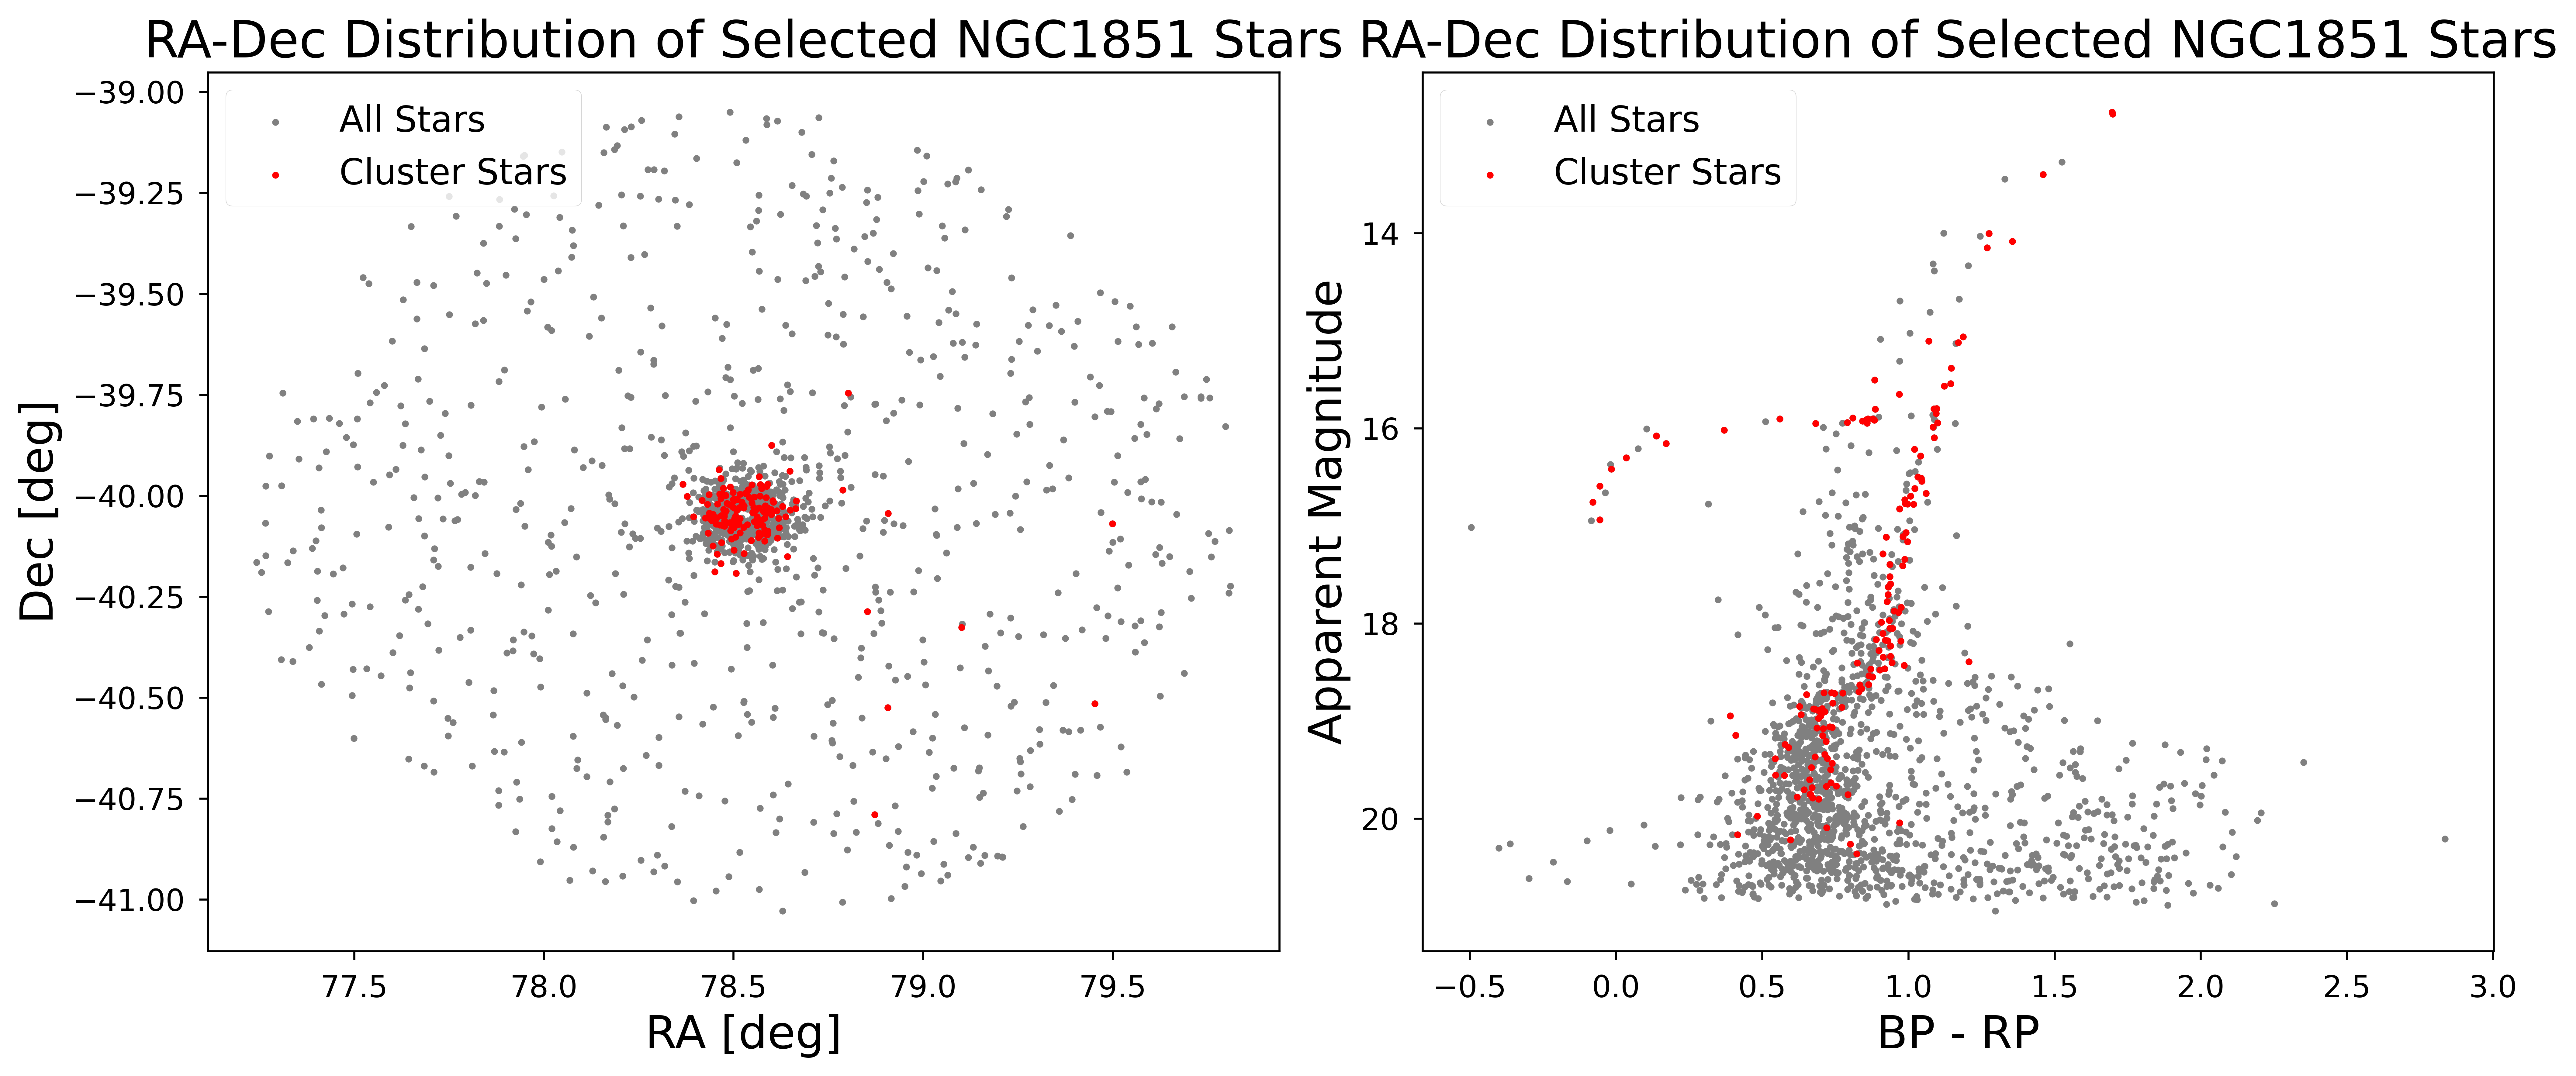

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    NGC1851_data_dered.ra, NGC1851_data_dered.dec, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.ra, NGC1851_pm_filtered.dec, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"RA [deg]", fontsize=18)
axes[0].set_ylabel(r"Dec [deg]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("RA-Dec Distribution of Selected NGC1851 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP, NGC1851_pm_filtered.dered_G, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("RA-Dec Distribution of Selected NGC1851 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



In [198]:
# ---------------- Print Summary of Indetified Cluster Stars ----------------
summary_data = {
    "Cut Criteria": ["Initial Stars (Gaia Source)", "Cluster Stars from no cut (By PM cut)"],
    "Number of Stars": [len(NGC1851_data_dered),f"{len(NGC1851_pm_filtered)}: ({len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100:.1f}%)"]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria Number of Stars
0            Initial Stars (Gaia Source)            1582
1  Cluster Stars from no cut (By PM cut)     151: (9.5%)

## Success of Filtering Stars
### Preposed Cuts

| Parameter                | Value |
|--------------------------|-------|
| Proposed BP-RP Lower Cut | 0.5   |
| Proposed BP-RP Upper Cut | 2   |
| Proposed Magnitude Cut   | 19    |
| Proposed Parallax Cut    | -0.3  |
| Proposed Abs Mag Cut     | 5.2 | 


In [199]:
preposed_BP_RP_lo, preposed_BP_RP_hi = 0.5, 2
preposed_mag_cut = 19
preposed_parralax_cut = -0.3
preposed_abs_mag_cut = 5.2

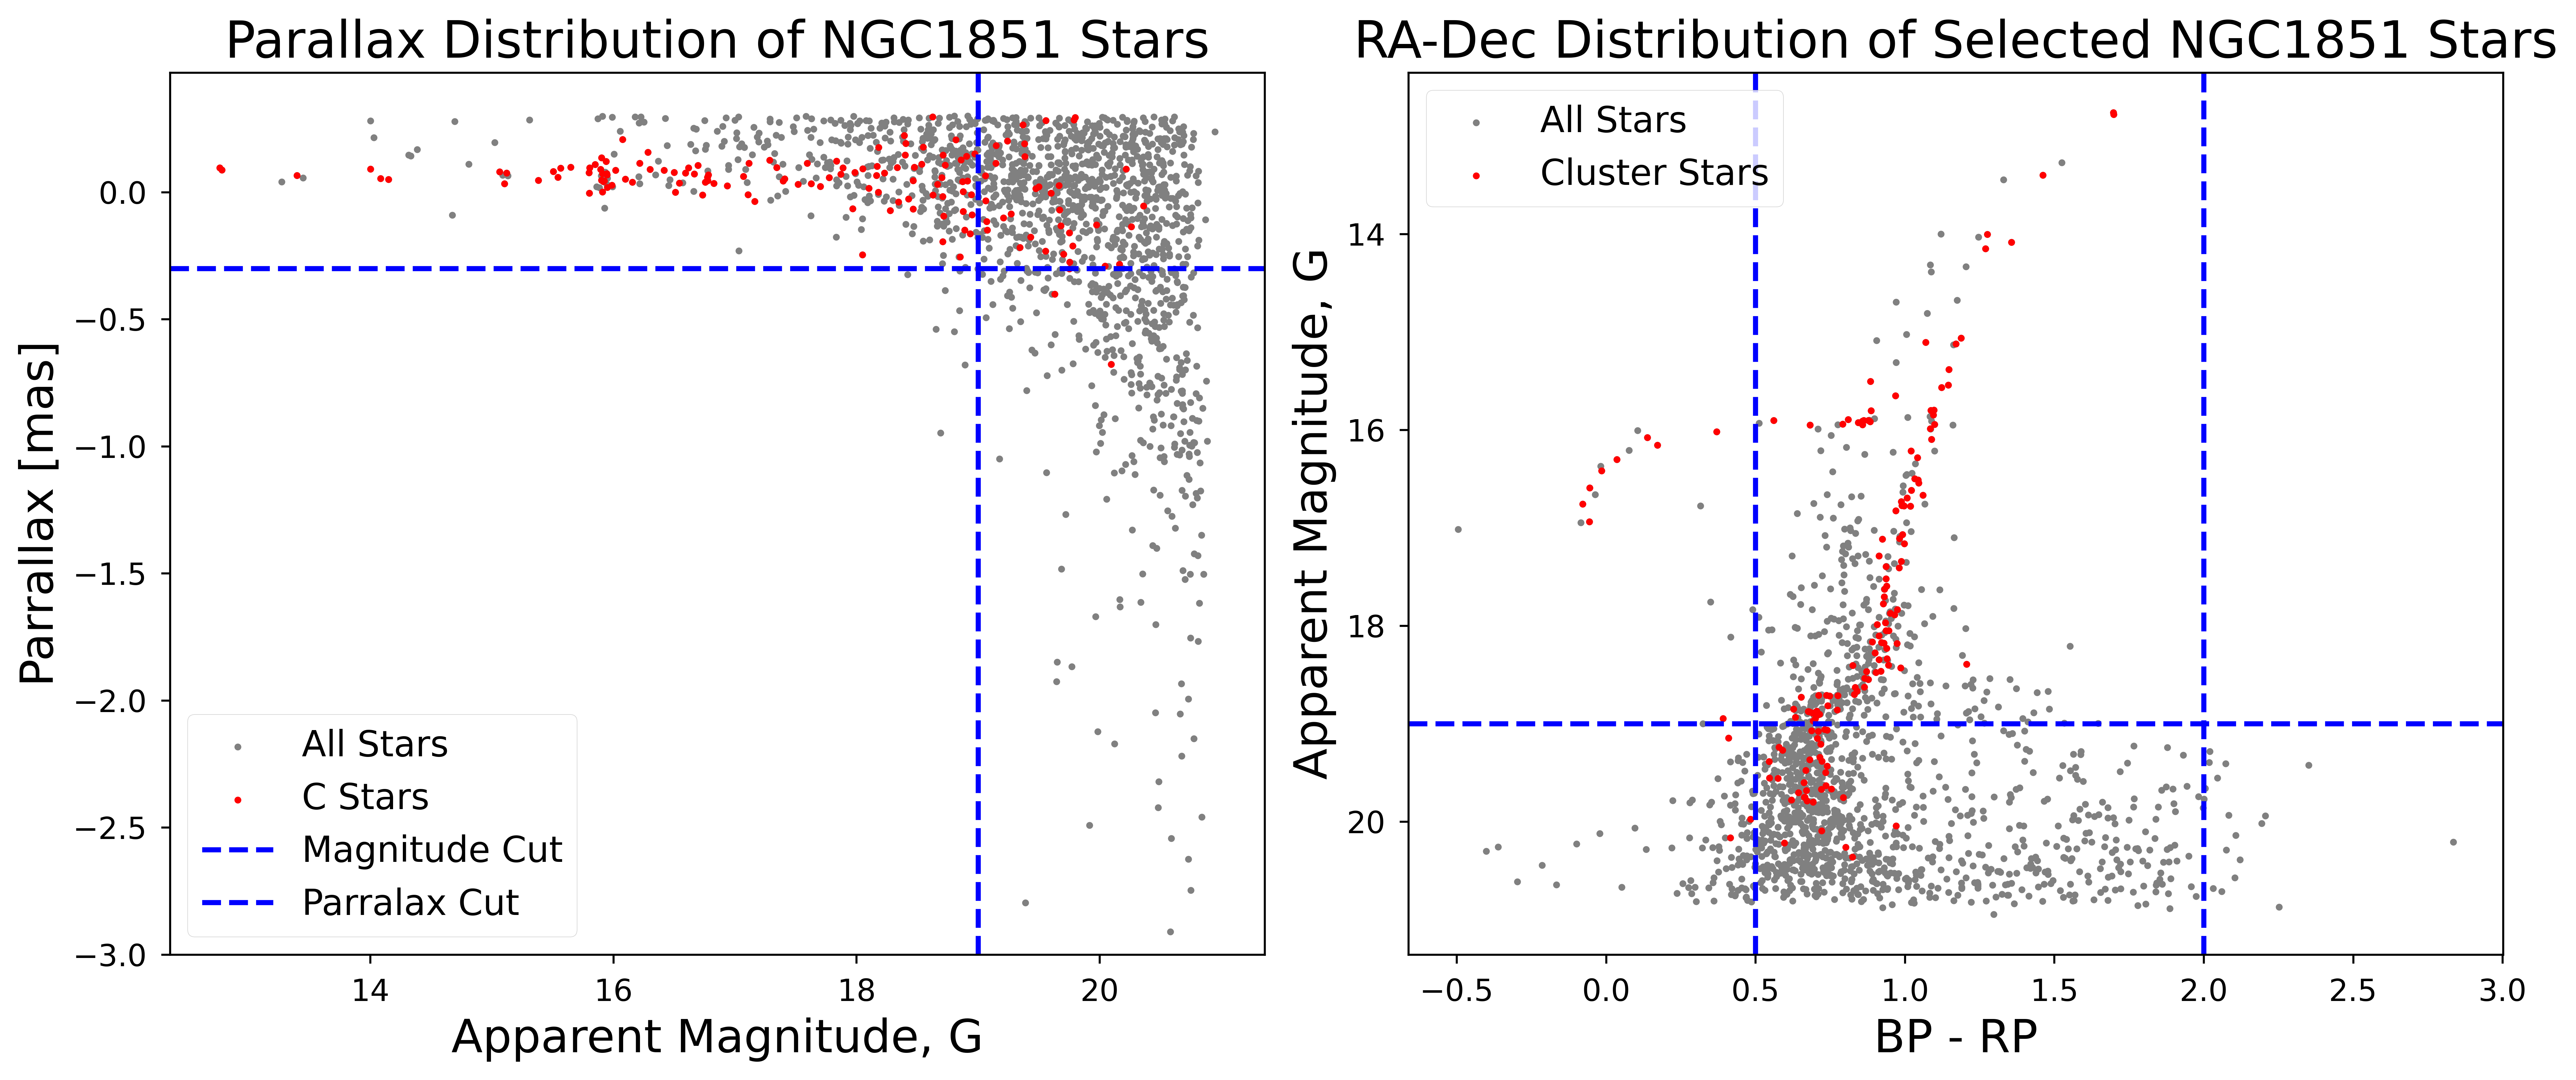

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

bp_rp_filtered, g_filtered = NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP, NGC1851_pm_filtered.dered_G

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.parallax, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.parallax, c="red", s=6, label="C Stars"
)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[0].axhline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=2, label="Parralax Cut")
axes[0].set_ylim(-3, None)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Parrallax [mas]", fontsize=18)
axes[0].legend(fontsize=14, loc="lower left")
axes[0].set_title("Parallax Distribution of NGC1851 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    bp_rp_filtered, g_filtered, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude, G", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("RA-Dec Distribution of Selected NGC1851 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()
axes[1].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[1].axvline(preposed_BP_RP_hi, color="blue", linestyle="--", linewidth=2)
axes[1].axhline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")

plt.tight_layout()
plt.show()

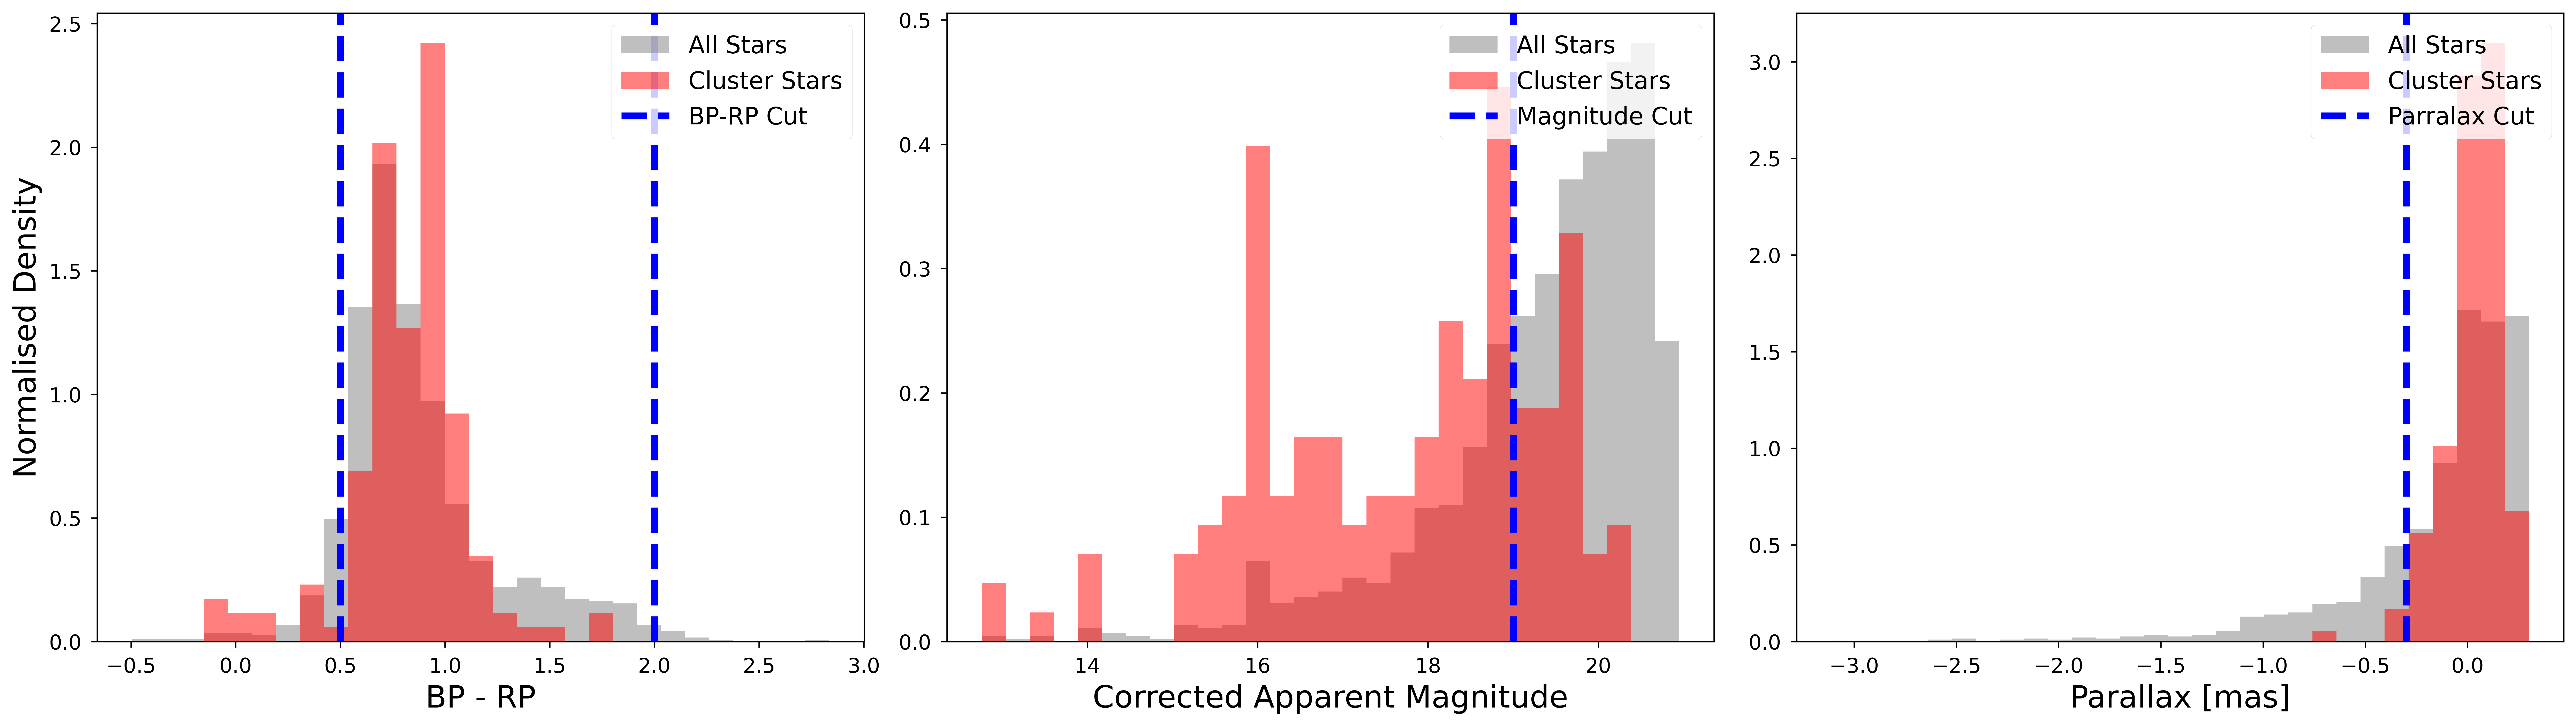

In [201]:
# ---------------- Halo RGB Filter ----------------

fig, axes = plt.subplots(1, 3, figsize=(21, 6), dpi=600)


# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(bp_rp_after.min(), bp_rp_filtered.min()),
                   max(bp_rp_after.max(), bp_rp_filtered.max()), 30)

axes[0].hist(
    bp_rp_after, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[0].hist(
    bp_rp_filtered, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[0].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=4, label="BP-RP Cut")
axes[0].axvline(preposed_BP_RP_hi, color="blue", linestyle="--", linewidth=4)
axes[0].set_xlabel("BP - RP", fontsize=18)
axes[0].set_ylabel("Normalised Density", fontsize=18)
axes[0].legend(fontsize=14, loc="upper right")
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.dered_G.min(), NGC1851_pm_filtered.dered_G.min()),
                   max(NGC1851_data_dered.dered_G.max(), NGC1851_pm_filtered.dered_G.max()), 30)

axes[1].hist(
    NGC1851_data_dered.dered_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.dered_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")

axes[1].set_xlabel("Corrected Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.parallax.min(), NGC1851_pm_filtered.parallax.min()),
                   max(NGC1851_data_dered.parallax.max(), NGC1851_pm_filtered.parallax.max()), 30)

axes[2].hist(
    NGC1851_data_dered.parallax, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[2].hist(
    NGC1851_pm_filtered.parallax, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[2].axvline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=4, label="Parralax Cut")
axes[2].set_xlabel("Parallax [mas]", fontsize=18)
axes[2].legend(fontsize=14, loc="upper right")
axes[2].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


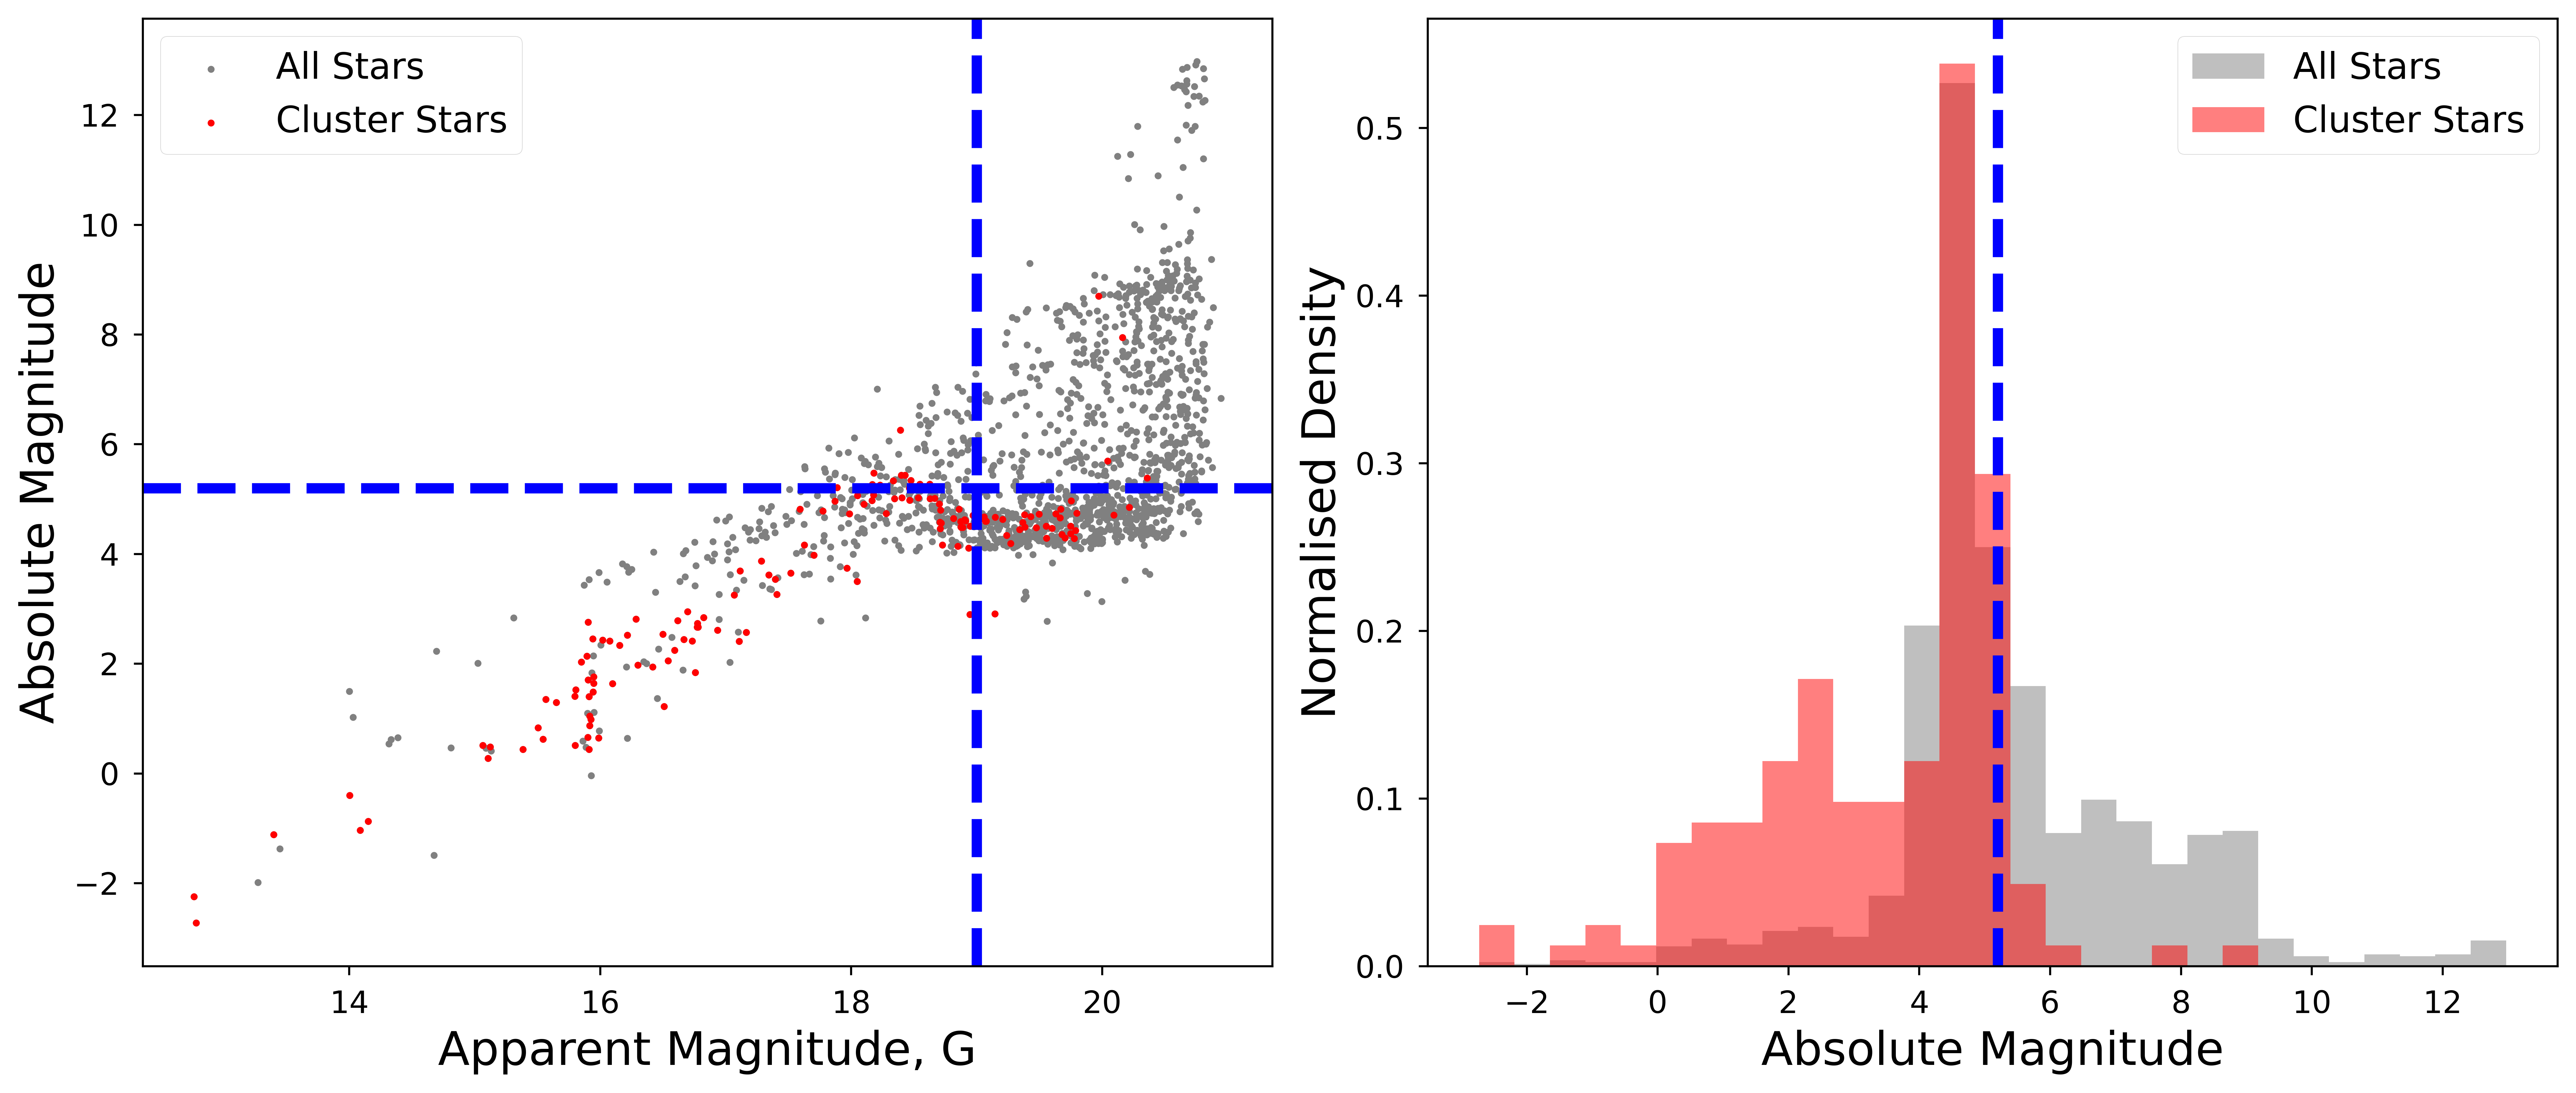

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                  No Cut                   1582                   151   
1      With Magnitude Cut                    475                   114   
2  With Abs Magnitude Cut                    913                   135   
3               Both Cuts                    375                   102   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                        9.5%                             N/A  
1                       24.0%                           14.5%  
2                       14.8%                            5.2%  
3                       27.2%                           17.7%

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: Absolute Magnitude vs Corrected G Magnitude ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.abs_G, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.abs_G, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Absolute Magnitude", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].tick_params(axis="both", labelsize=12)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")
axes[0].axhline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")

# ------------ Display Normalised Absolute Magnitude Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.abs_G.min(), NGC1851_pm_filtered.abs_G.min()),
                   max(NGC1851_data_dered.abs_G.max(), NGC1851_pm_filtered.abs_G.max()), 30)

axes[1].hist(
    NGC1851_data_dered.abs_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.abs_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Absolute Magnitude", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].axvline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")
plt.tight_layout()
plt.show()


# Comparison on filters
# Magnitude Cut
NGC1851_data_dered_mag_cut = NGC1851_data_dered[NGC1851_data_dered.dered_G < preposed_mag_cut]
NGC1851_pm_filtered_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.dered_G < preposed_mag_cut]

# Abs Mag Cut
NGC1851_data_dered_abs_mag_cut = NGC1851_data_dered[NGC1851_data_dered.abs_G < preposed_abs_mag_cut]
NGC1851_pm_filtered_abs_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
NGC1851_data_dered_all_cuts_mag = NGC1851_data_dered[
    (NGC1851_data_dered.dered_G < preposed_mag_cut) &
    (NGC1851_data_dered.abs_G < preposed_abs_mag_cut)
]
NGC1851_pm_filtered_all_cuts_mag = NGC1851_pm_filtered[
    (NGC1851_pm_filtered.dered_G < preposed_mag_cut) &
    (NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data_mag = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With Abs Magnitude Cut", "Both Cuts"],
    "Total Number of Stars": [
        len(NGC1851_data_dered),
        len(NGC1851_data_dered_mag_cut),
        len(NGC1851_data_dered_abs_mag_cut),
        len(NGC1851_data_dered_all_cuts_mag)
    ],
    "No. of Cluster Stars": [
        len(NGC1851_pm_filtered),
        len(NGC1851_pm_filtered_mag_cut),
        len(NGC1851_pm_filtered_abs_mag_cut),
        len(NGC1851_pm_filtered_all_cuts_mag)
    ],
    "Percentage of Cluster Stars": [
        f"{len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_all_cuts_mag)/len(NGC1851_data_dered_all_cuts_mag)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_all_cuts_mag)/len(NGC1851_data_dered_all_cuts_mag)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%"
    ]
}
summary_df = pd.DataFrame(summary_data_mag)
display(summary_df)

In [203]:
NGC1851_pm_filtered = NGC1851_data_dered[
    (NGC1851_data_dered.pmra > pmra_lim_lo) & (NGC1851_data_dered.pmra < pmra_lim_hi) &
    (NGC1851_data_dered.pmdec > pmdec_lim_lo) & (NGC1851_data_dered.pmdec < pmdec_lim_hi)
]

In [210]:
# ---------------- Print Summary of Star Numbers after cut ----------------
# Magnitude Cut
NGC1851_data_dered_mag_cut = NGC1851_data_dered[NGC1851_data_dered.dered_G < preposed_mag_cut]
NGC1851_pm_filtered_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.dered_G < preposed_mag_cut]

# Lower BP-RP Cut
NGC1851_data_dered_bp_rp_lo_cut = NGC1851_data_dered[NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP > preposed_BP_RP_lo]
NGC1851_pm_filtered_bp_rp_lo_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP > preposed_BP_RP_lo]

# Upper BP-RP Cut
NGC1851_data_dered_bp_rp_hi_cut = NGC1851_data_dered[NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP < preposed_BP_RP_hi]
NGC1851_pm_filtered_bp_rp_hi_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP < preposed_BP_RP_hi]

# Parallax Cut
NGC1851_data_dered_parallax_cut = NGC1851_data_dered[NGC1851_data_dered.parallax > preposed_parralax_cut]
NGC1851_pm_filtered_parallax_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.parallax > preposed_parralax_cut]

# Abs Mag Cut
NGC1851_data_dered_abs_mag_cut = NGC1851_data_dered[NGC1851_data_dered.abs_G < preposed_abs_mag_cut]
NGC1851_pm_filtered_abs_mag_cut = NGC1851_pm_filtered[NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
NGC1851_data_dered_all_cuts = NGC1851_data_dered[
    (NGC1851_data_dered.dered_G < preposed_mag_cut) &
    (NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP > preposed_BP_RP_lo) &
    (NGC1851_data_dered.dered_BP - NGC1851_data_dered.dered_RP < preposed_BP_RP_hi) &
    (NGC1851_data_dered.parallax > preposed_parralax_cut) &
    (NGC1851_data_dered.abs_G < preposed_abs_mag_cut)
]
NGC1851_pm_filtered_all_cuts = NGC1851_pm_filtered[
    (NGC1851_pm_filtered.dered_G < preposed_mag_cut) &
    (NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP > preposed_BP_RP_lo) &
    (NGC1851_pm_filtered.dered_BP - NGC1851_pm_filtered.dered_RP < preposed_BP_RP_hi) &
    (NGC1851_pm_filtered.parallax > preposed_parralax_cut) &
    (NGC1851_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With Abs Mag Cut", "With BP-RP Lower Cut", "With BP-RP Upper Cut", "With Parallax Cut", "All Cuts"],
    "Total Number of Stars": [
        len(NGC1851_data_dered),
        len(NGC1851_data_dered_mag_cut),
        len(NGC1851_data_dered_abs_mag_cut),
        len(NGC1851_data_dered_bp_rp_lo_cut),
        len(NGC1851_data_dered_bp_rp_hi_cut),
        len(NGC1851_data_dered_parallax_cut),
        len(NGC1851_data_dered_all_cuts)
    ],
    "No. of Cluster Stars": [
        len(NGC1851_pm_filtered),
        len(NGC1851_pm_filtered_mag_cut),
        len(NGC1851_pm_filtered_abs_mag_cut),
        len(NGC1851_pm_filtered_bp_rp_lo_cut),
        len(NGC1851_pm_filtered_bp_rp_hi_cut),
        len(NGC1851_pm_filtered_parallax_cut),
        len(NGC1851_pm_filtered_all_cuts)
    ],
    "Percentage of Cluster Stars": [
        f"{len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_bp_rp_lo_cut)/len(NGC1851_data_dered_bp_rp_lo_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_bp_rp_hi_cut)/len(NGC1851_data_dered_bp_rp_hi_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_parallax_cut)/len(NGC1851_data_dered_parallax_cut)*100:.1f}%",
        f"{len(NGC1851_pm_filtered_all_cuts)/len(NGC1851_data_dered_all_cuts)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(NGC1851_pm_filtered_mag_cut)/len(NGC1851_data_dered_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_abs_mag_cut)/len(NGC1851_data_dered_abs_mag_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_bp_rp_lo_cut)/len(NGC1851_data_dered_bp_rp_lo_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_bp_rp_hi_cut)/len(NGC1851_data_dered_bp_rp_hi_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_parallax_cut)/len(NGC1851_data_dered_parallax_cut)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%",
        f"{(len(NGC1851_pm_filtered_all_cuts)/len(NGC1851_data_dered_all_cuts)*100 - len(NGC1851_pm_filtered)/len(NGC1851_data_dered)*100):.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                No Cut                   1582                   151   
1    With Magnitude Cut                    475                   114   
2      With Abs Mag Cut                    913                   135   
3  With BP-RP Lower Cut                   1464                   139   
4  With BP-RP Upper Cut                   1564                   151   
5     With Parallax Cut                   1227                   148   
6              All Cuts                    349                    93   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                        9.5%                             N/A  
1                       24.0%                           14.5%  
2                       14.8%                            5.2%  
3                        9.5%                           -0.1%  
4                        9.7%                            0.1%  
5                       12.1%                            2.5%  
6                       26.6%                           17.1%

### Investigating Validity of other potential Cuts (Surface Temp and Log G from Gaia)
- These are found not to be viable due to the inaccuracy of this data from gaia

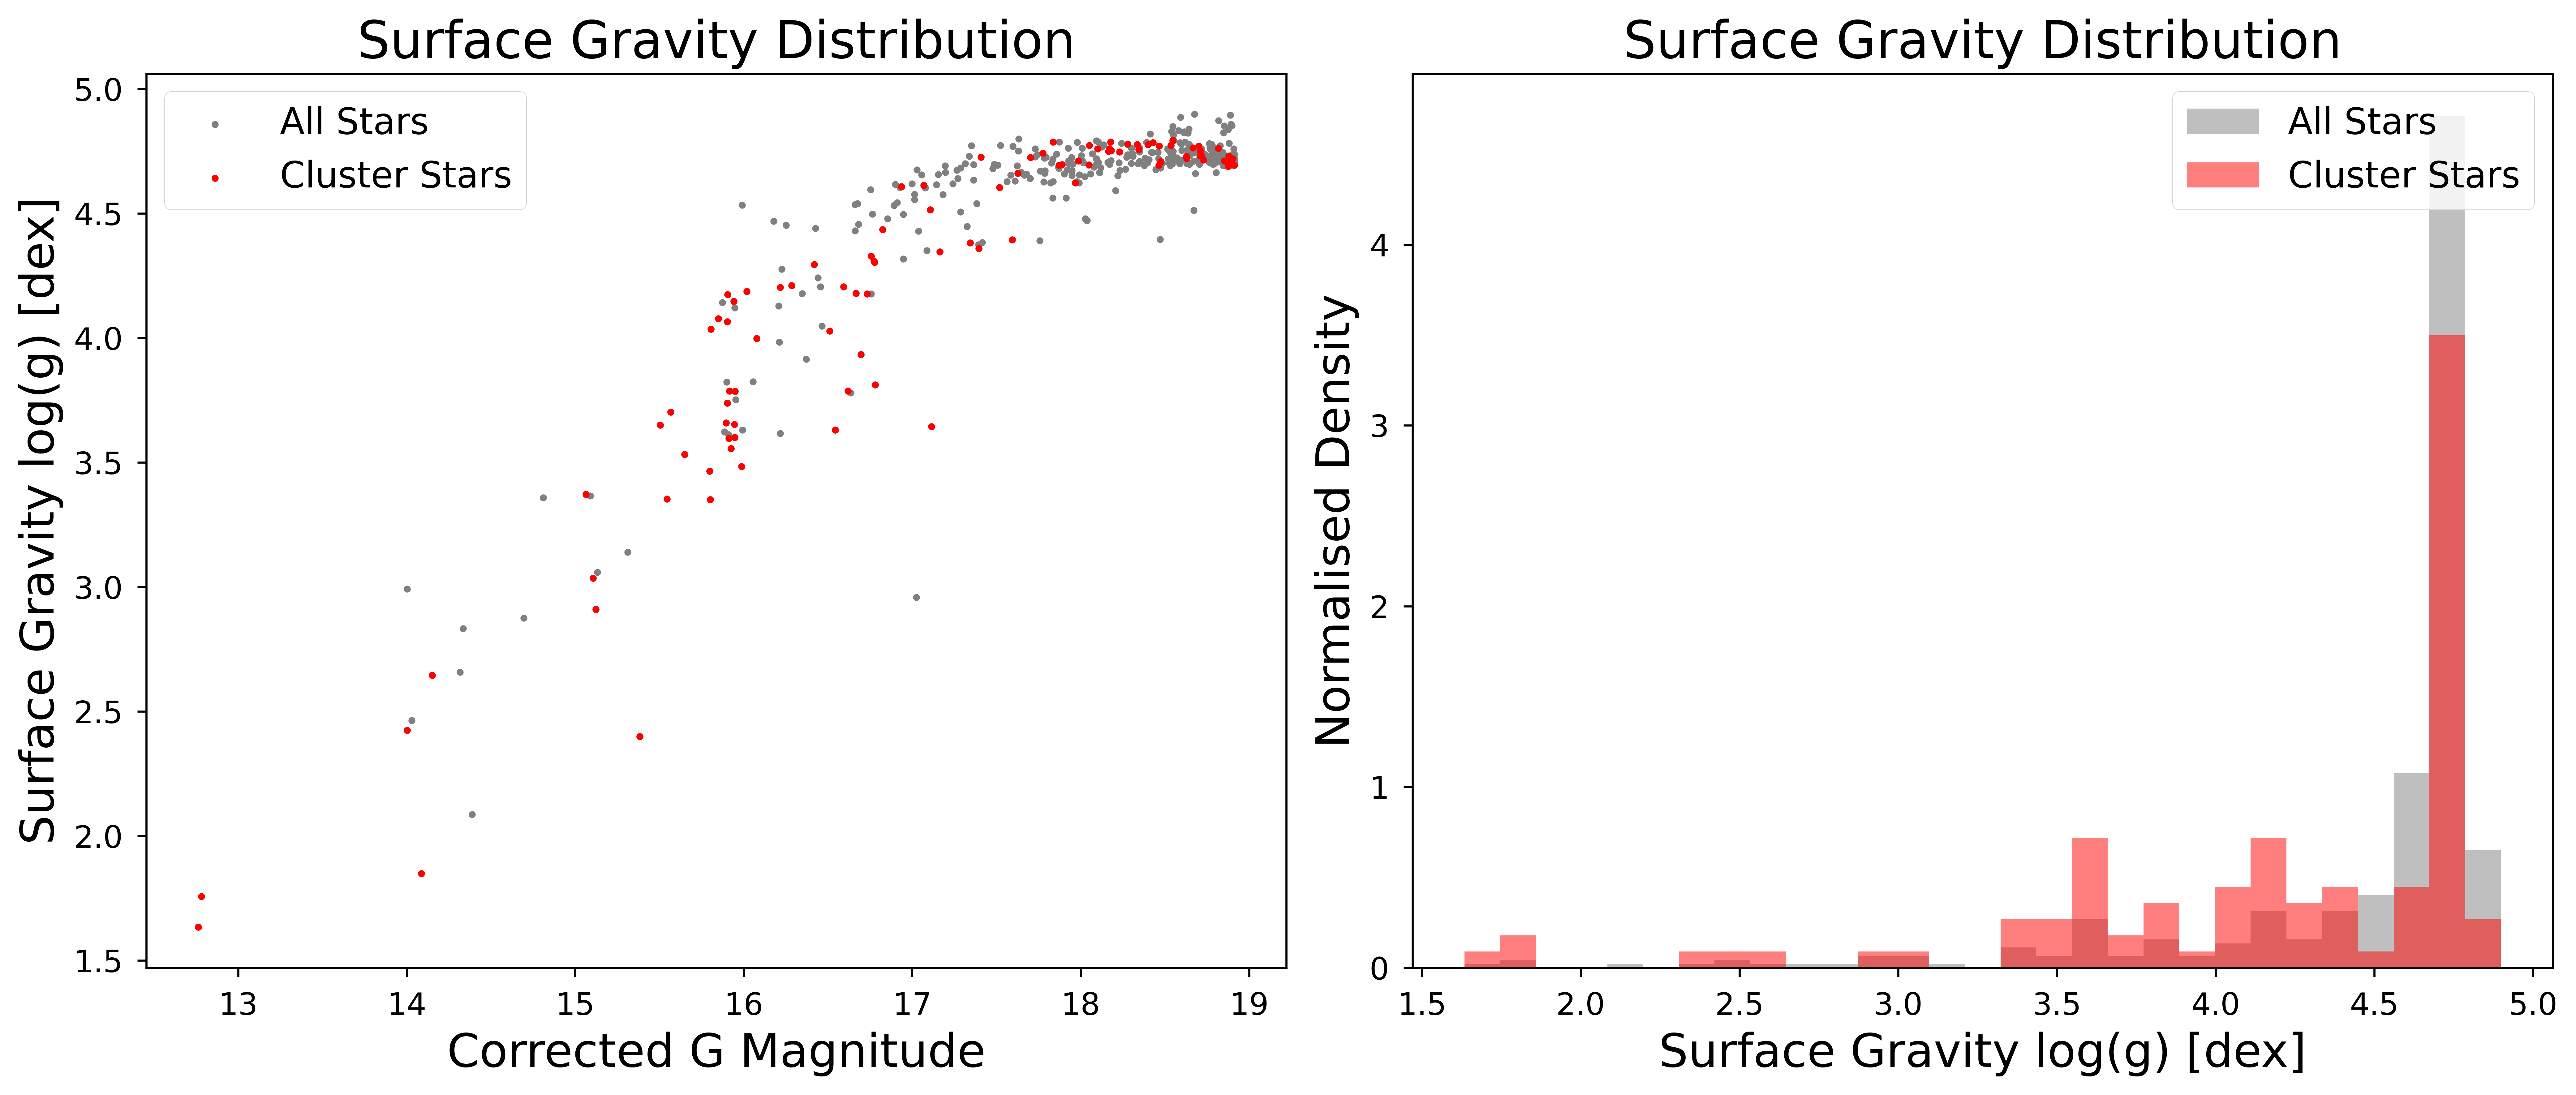

In [209]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: logg_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.logg_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.logg_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Surface Gravity Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized logg_gspphot Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.logg_gspphot.min(), NGC1851_pm_filtered.logg_gspphot.min()),
                   max(NGC1851_data_dered.logg_gspphot.max(), NGC1851_pm_filtered.logg_gspphot.max()), 30)

axes[1].hist(
    NGC1851_data_dered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Surface Gravity Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

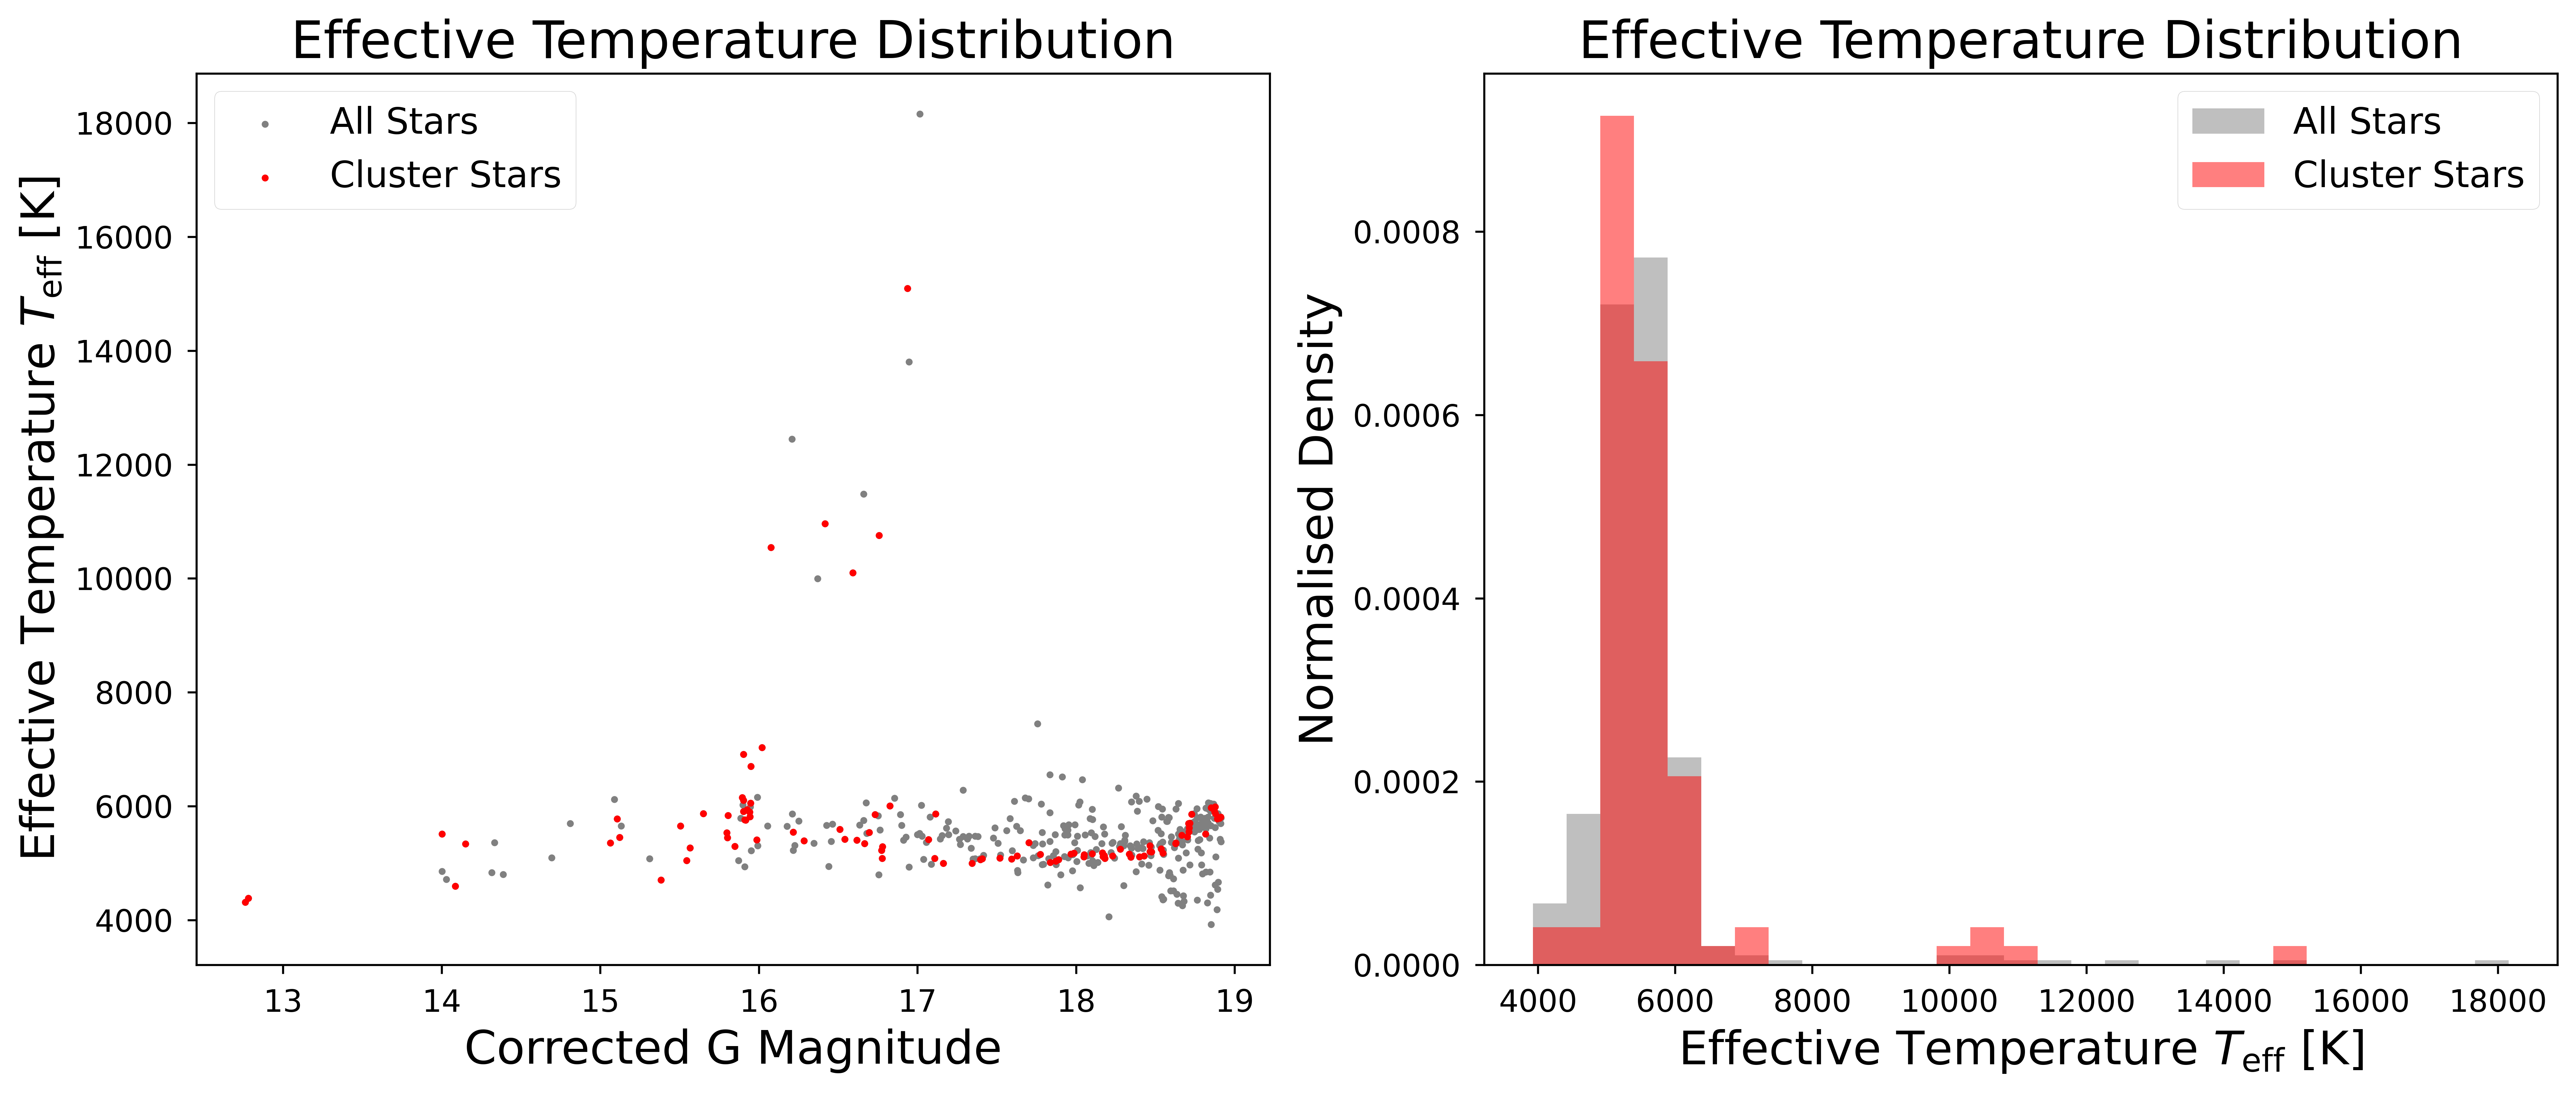

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: teff_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.teff_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.teff_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Effective Temperature Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized teff_gspphot Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.teff_gspphot.min(), NGC1851_pm_filtered.teff_gspphot.min()),
                   max(NGC1851_data_dered.teff_gspphot.max(), NGC1851_pm_filtered.teff_gspphot.max()), 30)

axes[1].hist(
    NGC1851_data_dered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Effective Temperature Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

### Investigating the Bailer Jones Distances

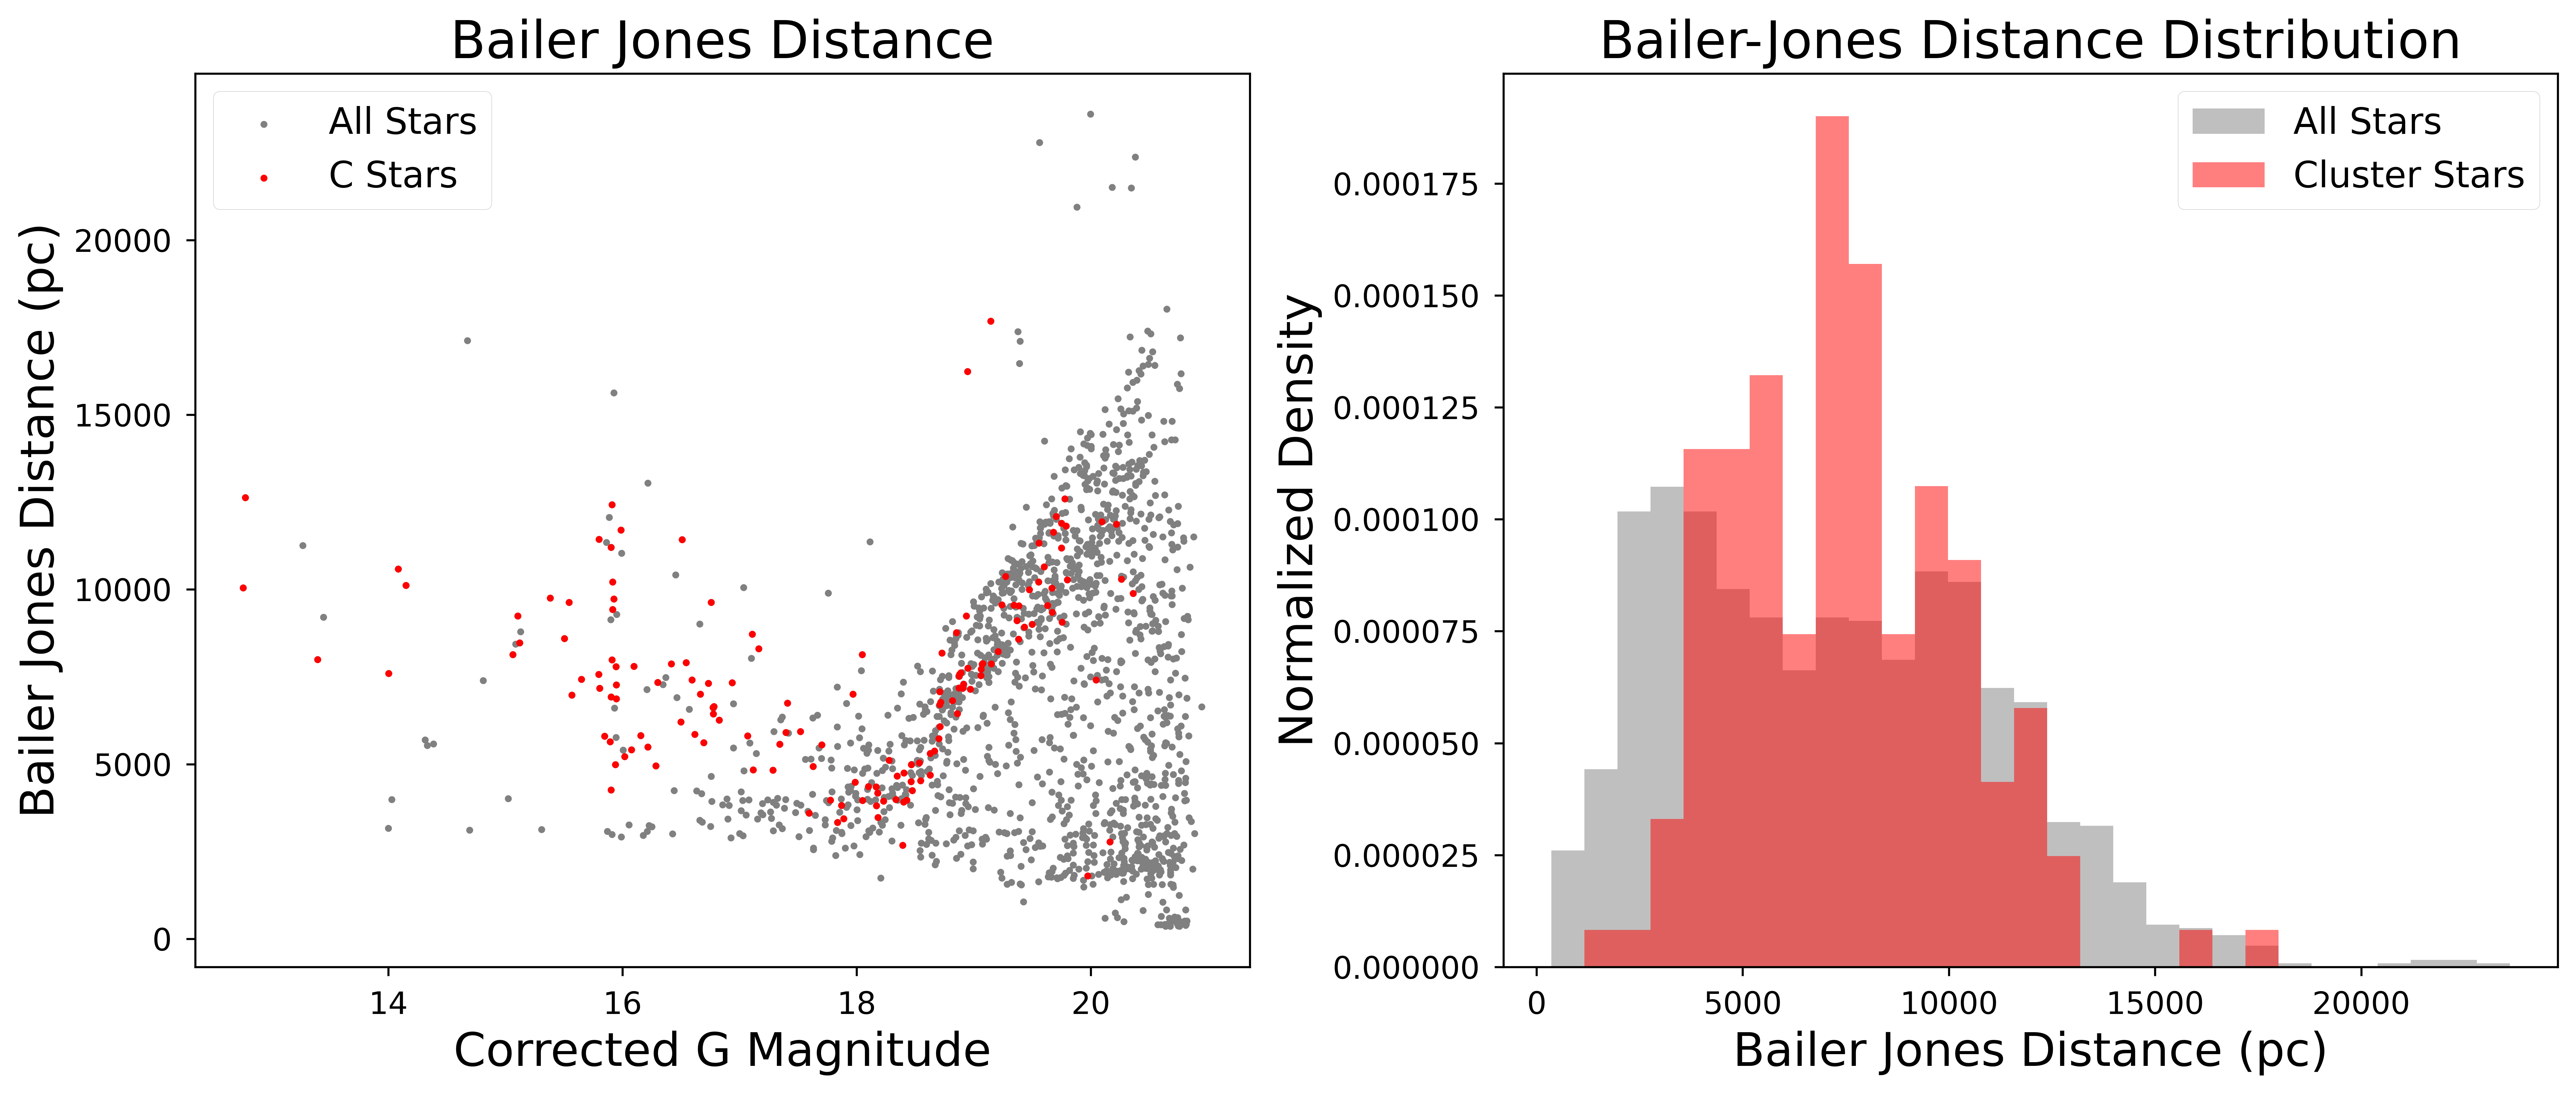

In [207]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    NGC1851_data_dered.dered_G, NGC1851_data_dered.r_med_photogeo, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    NGC1851_pm_filtered.dered_G, NGC1851_pm_filtered.r_med_photogeo, c="red", s=6, label="C Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Bailer Jones Distance (pc)", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Bailer Jones Distance", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(NGC1851_data_dered.r_med_photogeo.min(), NGC1851_pm_filtered.r_med_photogeo.min()),
                   max(NGC1851_data_dered.r_med_photogeo.max(), NGC1851_pm_filtered.r_med_photogeo.max()), 30)

axes[1].hist(
    NGC1851_data_dered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    NGC1851_pm_filtered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel("Bailer Jones Distance (pc)", fontsize=18)
axes[1].set_ylabel("Normalized Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Bailer-Jones Distance Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()
